# Importamos librerías a utilizar

In [8]:
#Para crear y análizar redes
import networkx as nx
import pylab
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt

#  Creación de la red

Creamos la red como una lista de enlaces, donde cada enlace tiene el atributo weight que indica que tan fuerte es la amistad en una escala de 1 a 3

In [9]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red

In [10]:
G = nx.Graph(lista_enlaces)

## Informacion de la red

Función que imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [11]:
def imprime_informacion(G):
    # nodos
    n = len(nx.nodes(G))
    # enlaces
    m = len(nx.edges(G))
    # diametro
    d = nx.diameter(G)
    # densidad
    densidad = nx.density(G)
    print("Informacion de la red: \n- nodos = " + str(n) +
          "\n- enlaces = " + str(m) +
          "\n- diámetro = " + str(d) +
         "\n- densidad = " + str(densidad))
    # Devuelve informacion de la red
    s = nx.info(G)
    print(s)

Llama a la función para imprimir información

In [12]:
imprime_informacion(G)

Informacion de la red: 
- nodos = 10
- enlaces = 16
- diámetro = 4
- densidad = 0.35555555555555557
Graph with 10 nodes and 16 edges


## Dibujamos la red

Función que gráfica la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica la red G y la guarda en un archivo png con el nombre alamcenado en nombre_red. 

In [13]:
def grafica_red(G, nombre_red):
    nx.draw(G,with_labels=True,node_color="pink")
    plt.savefig(nombre_red + ".png")
    pylab.show()

Llamamos a la función que gráfica la red

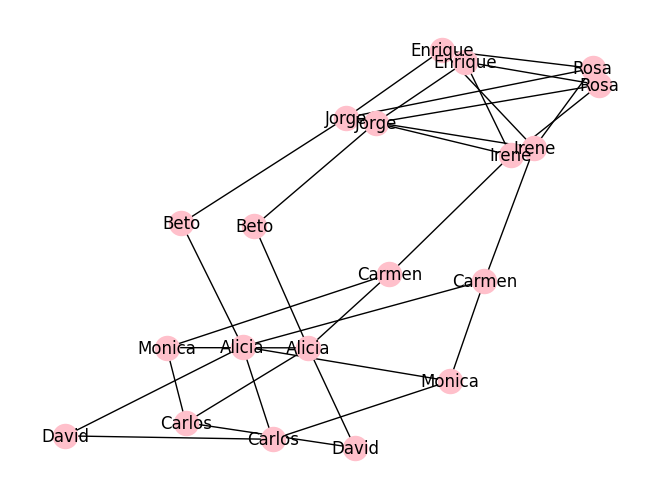

In [14]:
grafica_red(G, "amigos")

# Metricas de grado

## Distribucion de grados

Funcion que grafica la distribucion de grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [15]:
def grafica_distribucion_grados(G, nombre_dg):
    dist_grados = nx.degree_histogram(G)
    print(dist_grados)
    plt.title("Distribucion de Grados")
    plt.plot(dist_grados) 
    plt.xlabel("grado")
    plt.ylabel("# nodos")
    plt.savefig(nombre_dg + ".png")
    pylab.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()
    return dist_grados

Llama a la función para graficar las distribucion de grados

[0, 0, 2, 5, 2, 1]


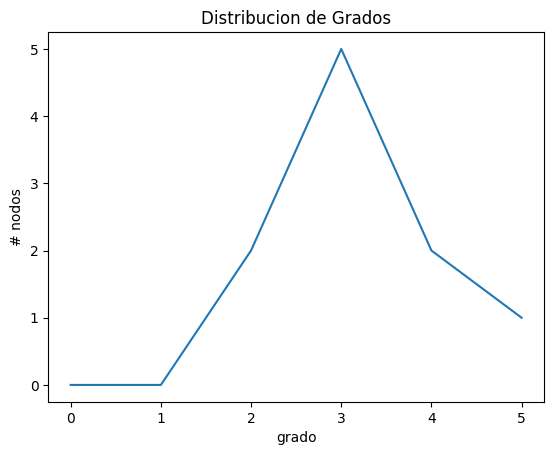

In [16]:
dist_grados = grafica_distribucion_grados(G, "distribucion_amigos")

## Grado promedio de la red

Función que cálcula el grado promedio de la red. Recibe la red G y su distribución de grados, imprime y devuelve el valor del grado promedio

In [17]:
def grado_promedio(G, dist_grados):
    i=0
    grados = 0
    for grado in dist_grados: 
        grados = grados + (grado * i)
        i+=1
    grado_prom = float(grados) / len(G.nodes())
    print("El grado promedio de la red es " + str(grado_prom))
    return grado_prom

Llama a la información para cálcular el grado promedio

In [18]:
grado_promedio(G, dist_grados)

El grado promedio de la red es 3.2


3.2

## Mapa de calor para el grado nodal
Funcion que grafica el mapa de calor del grado nodal. Recibe la red G y la variable mapcalor_grado. Gráfica el mapa de calor del grado nodal de la red G. La gráfica la guarda en un archivo png con nombre almacenado en la variable mapcalor_grado
### ACTIVIDAD 1
Modifica los colores del mapa de calor (ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html) Incluye esta función en el reporte de la práctica, comentando (con tus propias palabras) lo que hace cada linea de codigo

In [19]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ##se cambio 'cool' por 'hot' para que los colores fueran distintos
    mapa_color = plt.get_cmap('hot')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

### ACTIVIDAD 2
Llama a la función para gráficar el mapa de calor

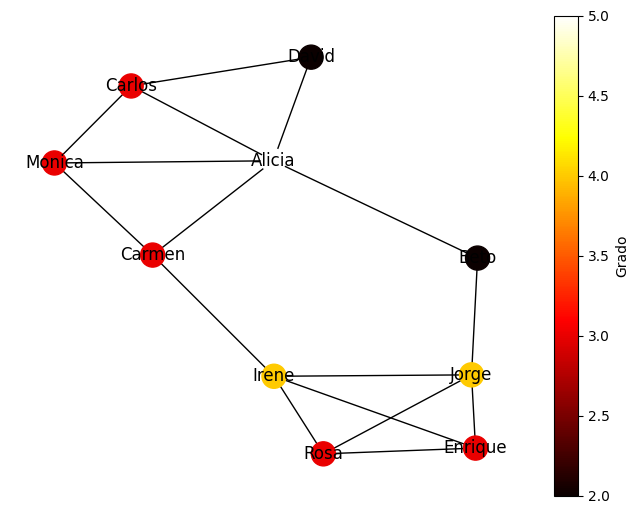

In [20]:

mapa_calor_grado(G,"primer mapa")

# Modelos de red

## Red completa
### ACTIVIDAD 3
Creamos una red completa de 10 nodos

In [21]:
lista_enlaces = [("Alicia","Beto"),
             ("Alicia","Carlos"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Alicia","Jorge"),
             ("Alicia","Enrique"),
             ("Alicia","Rosa"),
             ("Alicia","Irene"),
             ("Beto","Alicia"),
             ("Beto","Carlos"),
             ("Beto","David"),
             ("Beto","Carmen"),
             ("Beto","Monica"),
             ("Beto","Jorge"),
             ("Beto","Enrique"),
             ("Beto","Rosa"),
             ("Beto","Irene"),
             ("Carlos","Alicia"),
             ("Carlos","Beto"),
             ("Carlos","David"),
             ("Carlos","Carmen"),
             ("Carlos","Monica"),
             ("Carlos","Jorge"),
             ("Carlos","Enrique"),
             ("Carlos","Rosa"),
             ("Carlos","Irene"),
             ("David","Alicia"),
             ("David","Beto"),
             ("David","Carlos"),
             ("David","Carmen"),
             ("David","Monica"),
             ("David","Jorge"),
             ("David","Enrique"),
             ("David","Rosa"),
             ("David","Irene"),
             ("Carmen","Alicia"),
             ("Carmen","Beto"),
             ("Carmen","Carlos"),
             ("Carmen","David"),
             ("Carmen","Monica"),
             ("Carmen","Jorge"),
             ("Carmen","Enrique"),
             ("Carmen","Rosa"),
             ("Carmen","Irene"),
             ("Monica","Alicia"),
             ("Monica","Beto"),
             ("Monica","Carlos"),
             ("Monica","David"),
             ("Monica","Carmen"),
             ("Monica","Jorge"),
             ("Monica","Enrique"),
             ("Monica","Rosa"),
             ("Monica","Irene"),
             ("Jorge","Alicia"),
             ("Jorge","Beto"),
             ("Jorge","Carlos"),
             ("Jorge","David"),
             ("Jorge","Carmen"),
             ("Jorge","Monica"),
             ("Jorge","Enrique"),
             ("Jorge","Rosa"),
             ("Jorge","Irene"),
             ("Enrique","Alicia"),
             ("Enrique","Beto"),
             ("Enrique","Carlos"),
             ("Enrique","David"),
             ("Enrique","Carmen"),
             ("Enrique","Monica"),
             ("Enrique","Jorge"),
             ("Enrique","Rosa"),
             ("Enrique","Irene"),
             ("Rosa","Alicia"),
             ("Rosa","Beto"),
             ("Rosa","Carlos"),
             ("Rosa","David"),
             ("Rosa","Carmen"),
             ("Rosa","Monica"),
             ("Rosa","Jorge"),
             ("Rosa","Enrique"),
             ("Rosa","Irene"),
             ("Irene","Alicia"),
             ("Irene","Beto"),
             ("Irene","Carlos"),
             ("Irene","David"),
             ("Irene","Carmen"),
             ("Irene","Monica"),
             ("Irene","Jorge"),
             ("Irene","Enrique"),
             ("Irene","Rosa")]

In [22]:
G = nx.Graph(lista_enlaces)

### ACTIVIDAD 4
Llama a la función para imprimir información de la red completa

In [23]:
def imprime_informacion(G):
    # nodos
    n = len(nx.nodes(G))
    # enlaces
    m = len(nx.edges(G))
    # diametro
    d = nx.diameter(G)
    # densidad
    densidad = nx.density(G)
    print("Informacion de la red: \n- nodos = " + str(n) +
          "\n- enlaces = " + str(m) +
          "\n- diámetro = " + str(d) +
         "\n- densidad = " + str(densidad))
    # Devuelve informacion de la red
    s = nx.info(G)
    print(s)

In [24]:
imprime_informacion(G)

Informacion de la red: 
- nodos = 10
- enlaces = 45
- diámetro = 1
- densidad = 1.0
Graph with 10 nodes and 45 edges


### ACTIVIDAD 5
Llamamos a la función que gráfica la red

In [27]:
def grafica_red(G, nombre_red):
    nx.draw(G,with_labels=True,node_color="yellow")
    plt.savefig(nombre_red + ".png")
    pylab.show()

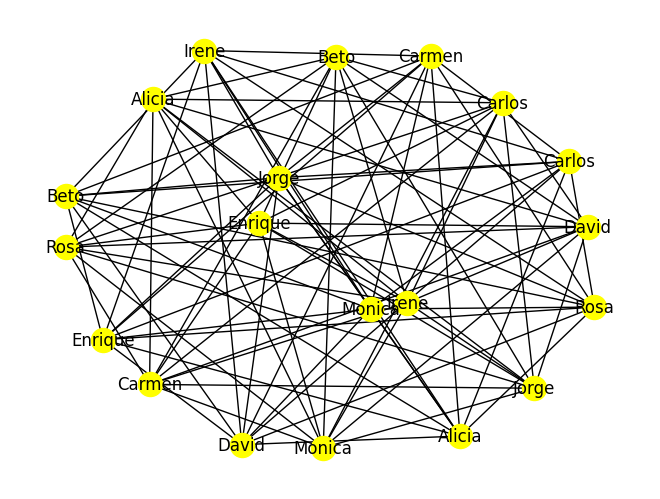

In [28]:
grafica_red(G, "Grafica act 5")

### ACTIVIDAD 6
Llama a la función para graficar las distribucion de grados de la red completa

In [29]:
def grafica_distribucion_grados(G, nombre_dg):
    dist_grados = nx.degree_histogram(G)
    print(dist_grados)
    plt.title("Distribucion de Grados")
    plt.plot(dist_grados) 
    plt.xlabel("grado")
    plt.ylabel("# nodos")
    plt.savefig(nombre_dg + ".png")
    pylab.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()
    return dist_grados

[0, 0, 0, 0, 0, 0, 0, 0, 0, 10]


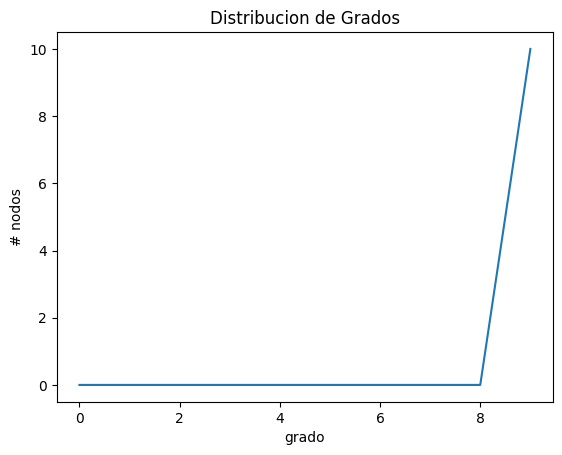

In [30]:
dist_grados = grafica_distribucion_grados(G, "distribucion_act_6")

### ACTIVIDAD 7
Llama a la información para cálcular el grado promedio de la red completa

In [31]:
def grado_promedio(G, dist_grados):
    i=0
    grados = 0
    for grado in dist_grados: 
        grados = grados + (grado * i)
        i+=1
    grado_prom = float(grados) / len(G.nodes())
    print("El grado promedio de la red es " + str(grado_prom))
    return grado_prom

In [32]:
grado_promedio(G, dist_grados)

El grado promedio de la red es 9.0


9.0

### ACTIVIDAD 8
Llama a la función para gráficar el mapa de calor (con respecto al grado nodal) de la red completa

In [33]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ##se cambio 'cool' por 'hot' para que los colores fueran distintos
    mapa_color = plt.get_cmap('winter')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

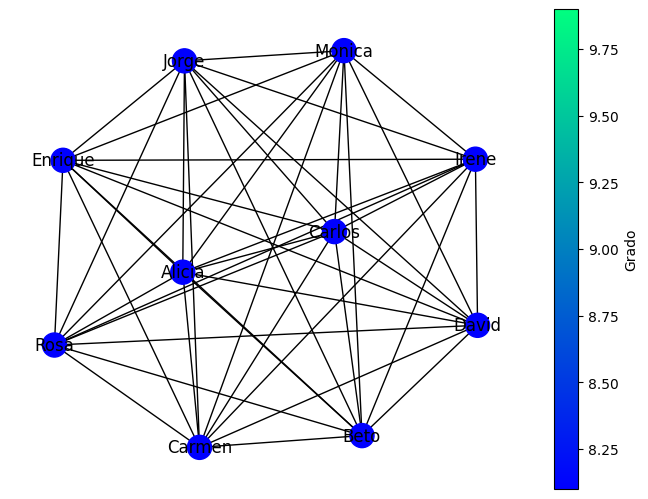

In [34]:
mapa_calor_grado(G,"Segundo mapa Act 8")

## Red aleatoria Barabasi-Albert
### ACTIVIDAD 9
Creamos una red aleatoria con el modelo Barabasi-Albert y con parámetros n=100 y m=5. Esto quiere decir que la red comienza con m=5 nodos y en cada iteracion se agrega un nuevo nodo que se conecta aletareamente m=5 nodos. El algoritmo termina cuando se tiene un total de n=100 nodos.

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

In [35]:
G=nx.barabasi_albert_graph(100,5)


### ACTIVIDAD 10
Llama a la función para imprimir información de la red de escala libre (modelo Barabasi-Albert) 

In [36]:
imprime_informacion(G)

Informacion de la red: 
- nodos = 100
- enlaces = 475
- diámetro = 4
- densidad = 0.09595959595959595
Graph with 100 nodes and 475 edges


### ACTIVIDAD 11
Llamamos a la función que gráfica la red de la red de escala libre 

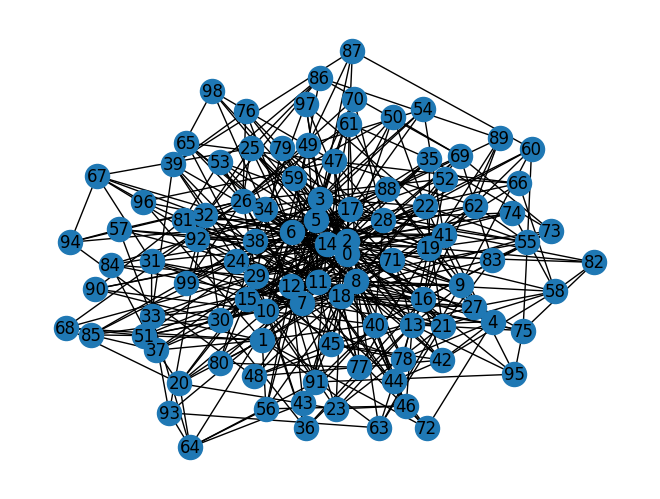

In [37]:
nx.draw(G, with_labels =True)
plt.show('Red aleatoria Barabasi')

### ACTIVIDAD 12
Llama a la función para graficar las distribucion de grados de la red de escala libre 

[0, 0, 0, 0, 0, 27, 17, 13, 9, 5, 4, 2, 4, 0, 2, 3, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1]


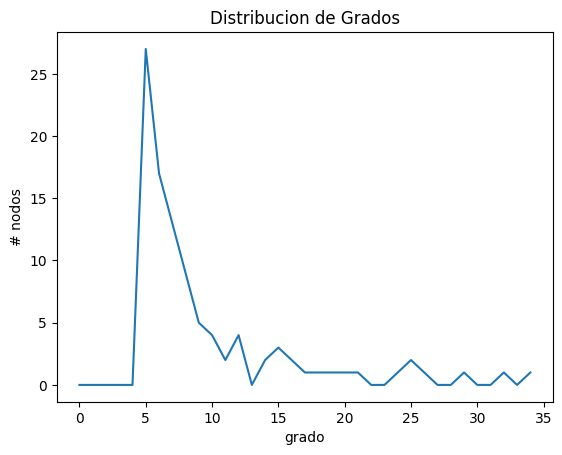

In [38]:
dist_grados = grafica_distribucion_grados(G, "distribucion_act_12_Barabasi")

### ACTIVIDAD 13
Llama a la información para cálcular el grado promedio de la red de escala libre 

In [39]:
grado_promedio(G, dist_grados)

El grado promedio de la red es 9.5


9.5

### ACTIVIDAD 14
Llama a la función para gráficar el mapa de calor de la red (con respecto al grado nodal) de escala libre 

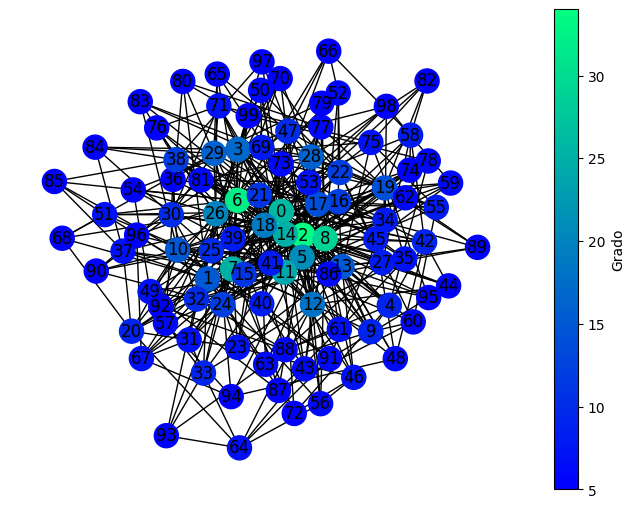

In [40]:
mapa_calor_grado(G,"Mapa calor Barabasi Act 14")

## Red aleatoria Erdős–Rényi (Gilbert)
### ACTIVIDAD 15
Creamos una red aleatoria con el modelo Erdős–Rényi (implementado con el algoritmo de Gilbert) y con parámteros n=100 y p=0.1. Eso quiere decir que la red tendrá n=100 y cada par de nodos se conectara con probabilidad p=0.1

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph

In [41]:
G= nx.erdos_renyi_graph(100,0.1)


### ACTIVIDAD 16
Llama a la función para imprimir información de la red de escala aleatoria (algoritmo Gilbert) 

In [42]:
imprime_informacion(G)

Informacion de la red: 
- nodos = 100
- enlaces = 503
- diámetro = 4
- densidad = 0.10161616161616162
Graph with 100 nodes and 503 edges


### ACTIVIDAD 17
Llamamos a la función que gráfica la red de la red de escala aleatoria

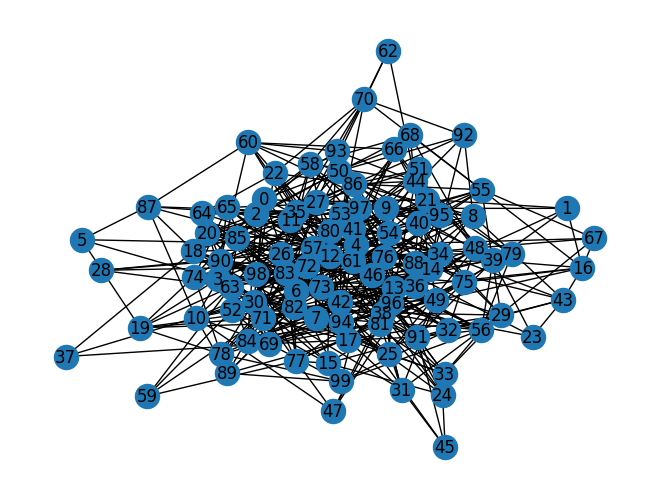

In [43]:
nx.draw(G, with_labels=True)
plt.show('Red aleatoria Erdos actividad 17')

### ACTIVIDAD 18
Llama a la función para graficar las distribucion de grados de la red de escala aleatoria

[0, 0, 0, 2, 5, 3, 1, 10, 7, 12, 18, 13, 7, 9, 5, 2, 4, 0, 1, 1]


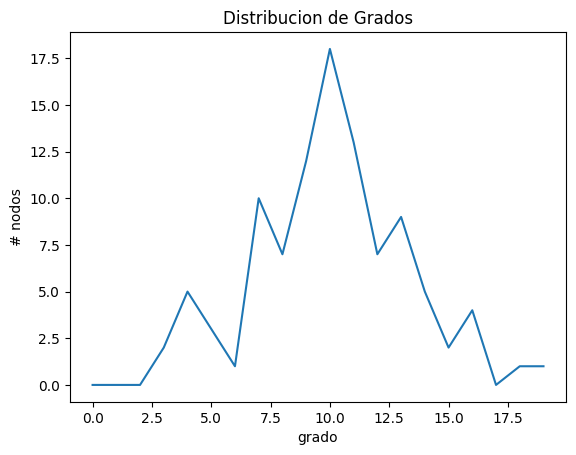

In [44]:
dist_grados = grafica_distribucion_grados(G, "distribucion_act_18_Erdos")

### ACTIVIDAD 19
Llama a la información para cálcular el grado promedio de la red de escala aleatoria

In [45]:
grado_promedio(G, dist_grados)

El grado promedio de la red es 10.06


10.06

### ACTIVIDAD 20
Llama a la función para gráficar el mapa de calor (con respecto al grado nodal) de la red de escala aleatoria

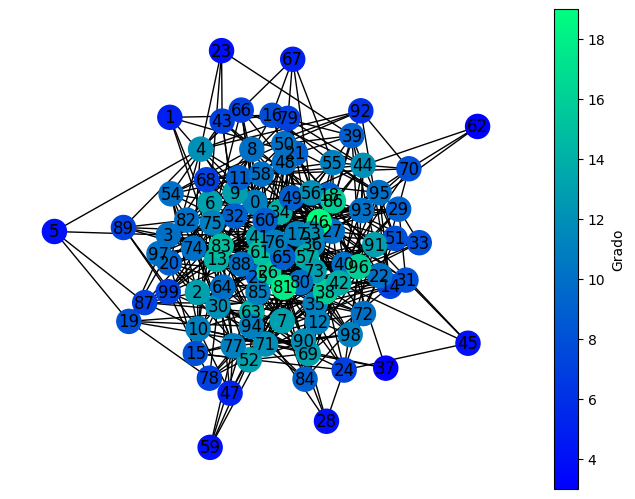

In [46]:
mapa_calor_grado(G,"Mapa calor Erdos Act 20")


## Red aleatoria Watts-Strogatz
### ACTIVIDAD 22
Creamos una red aleatoria con el modelo Watts-Strogatz (implementado con el algoritmo de Gilbert) y con parámteros n=100, k=8, p=0.0.5. Eso quiere decir que la red tendrá n=100 inicialmente conectados a si 8 vecinos más cercanos en un anillo. Durante la ejecución del algoritmo, cada enlace se reconectará con probabilidad p=0.01

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

In [47]:
G = nx.watts_strogatz_graph(100,8,0.5)


### ACTIVIDAD 23
Llama a la función para imprimir información de la red de mundo pequeño (Algoritmo Watts-Strogatz)

In [48]:
imprime_informacion(G)

Informacion de la red: 
- nodos = 100
- enlaces = 400
- diámetro = 4
- densidad = 0.08080808080808081
Graph with 100 nodes and 400 edges


### ACTIVIDAD 24
Llamamos a la función que gráfica la red de mundo pequeño

<Figure size 640x480 with 0 Axes>

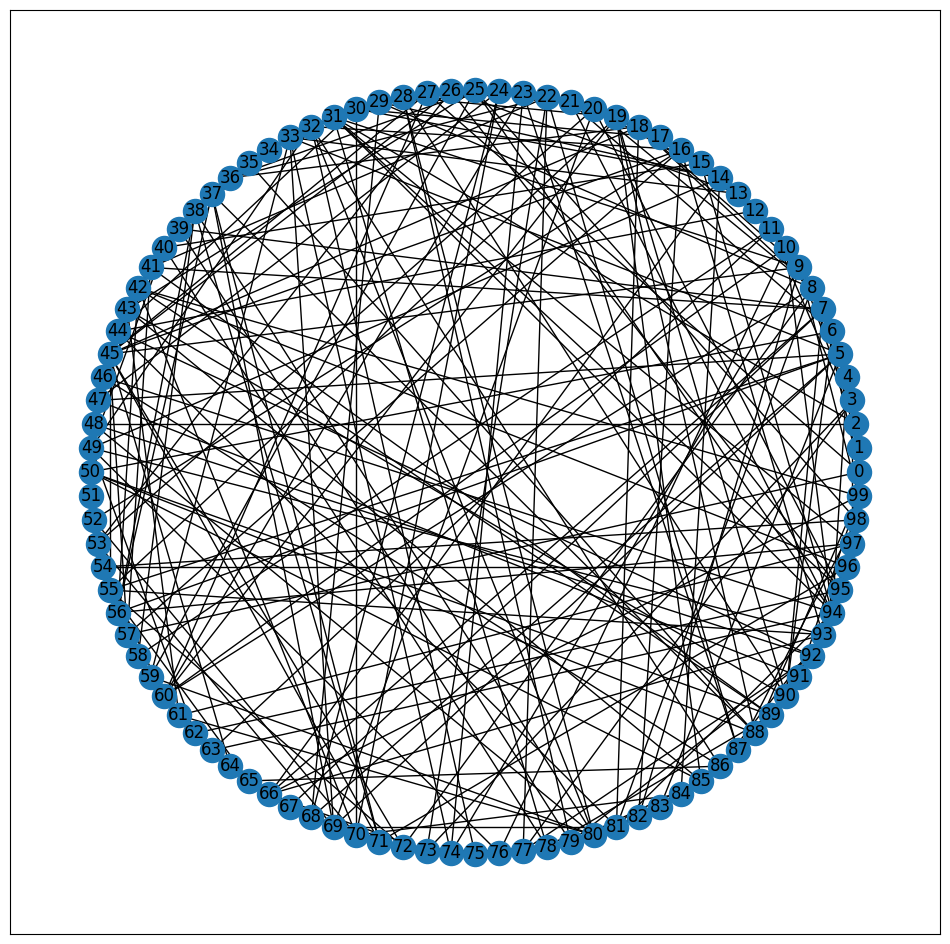

<Figure size 1200x1200 with 0 Axes>

In [50]:
pos = nx.circular_layout(G)
plt.figure(figsize = (12, 12))
pylab.show()
nx.draw_networkx(G, pos)

### ACTIVIDAD 25
Llama a la función para graficar las distribucion de grados de mundo pequeño

[0, 0, 0, 0, 1, 4, 16, 24, 19, 13, 14, 5, 4]


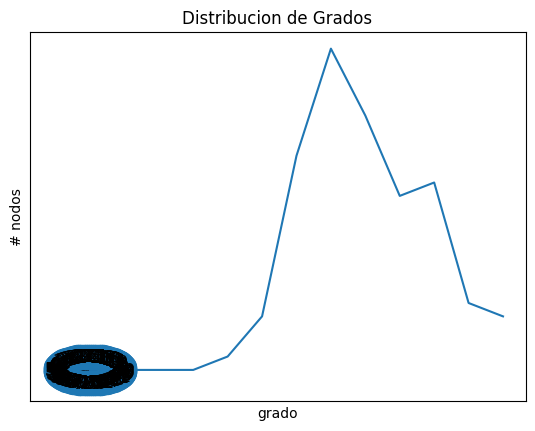

In [51]:
dist_grados = grafica_distribucion_grados(G, "distribucion_act_125_Watts")

### ACTIVIDAD 26
Llama a la información para cálcular el grado promedio de mundo pequeño

In [52]:
grado_promedio(G, dist_grados)

El grado promedio de la red es 8.0


8.0

### ACTIVIDAD 27
Llama a la función para gráficar el mapa de calor (con respecto al grado nodal) de la red de mundo pequeño

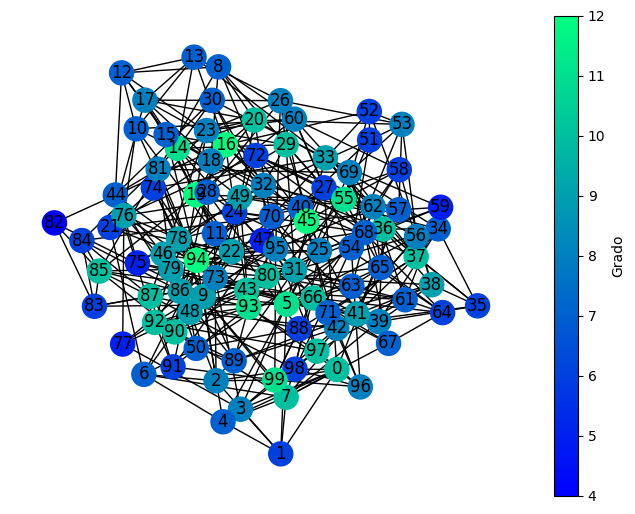

In [53]:
mapa_calor_grado(G,"Mapa calor Watts Act 27")

# Análisis de la distribucion de grado de la red aleatoria Watts-Strogatz

## ACTIVIDAD 28
Cree 9 redes con el modelo Watts-Strogatz y los parámetros n=100, k=8, tomando los siguientes valores de p = 0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1. Para cada red obtenga su gráfica de distribucion de probabilidad y mapa de calor de grado

[0, 0, 0, 0, 0, 0, 0, 0, 100]


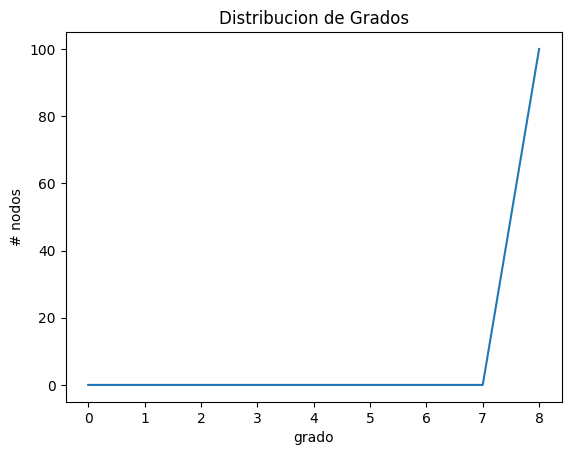

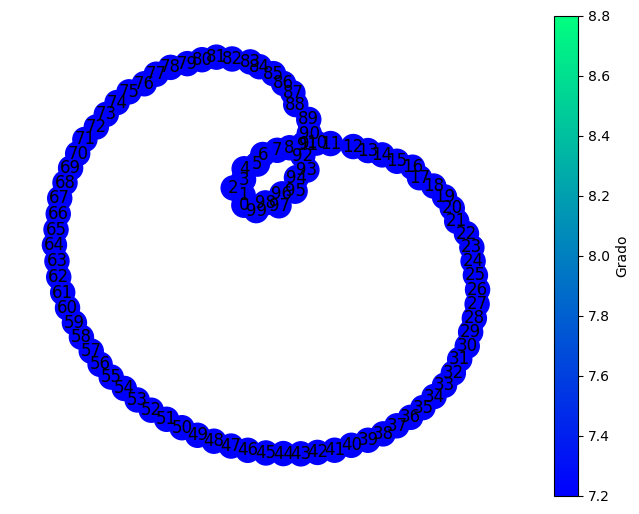

In [54]:
G = nx.watts_strogatz_graph(100,8,0)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-1_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-1")

[0, 0, 0, 0, 0, 0, 0, 4, 93, 2, 1]


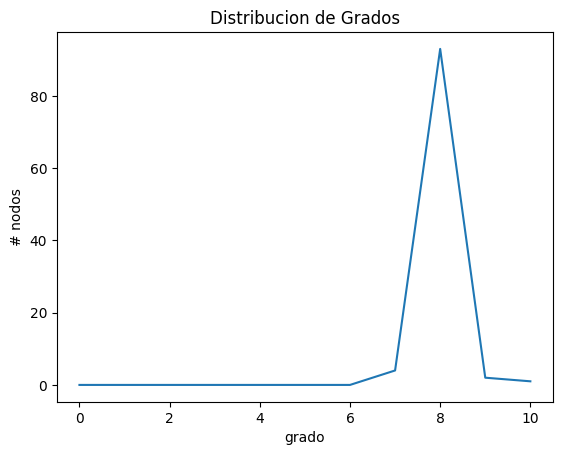

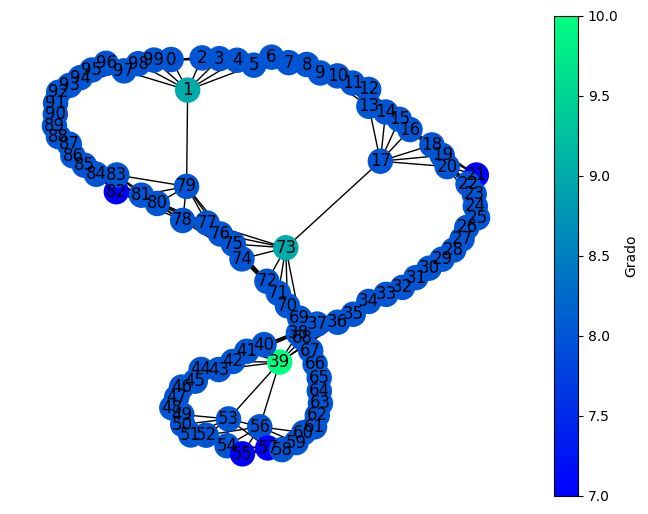

In [55]:
G = nx.watts_strogatz_graph(100,8,0.01)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-2_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-2")

[0, 0, 0, 0, 0, 0, 0, 7, 87, 5, 1]


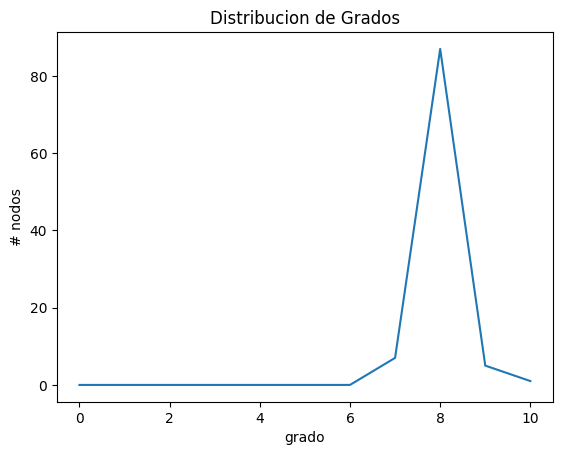

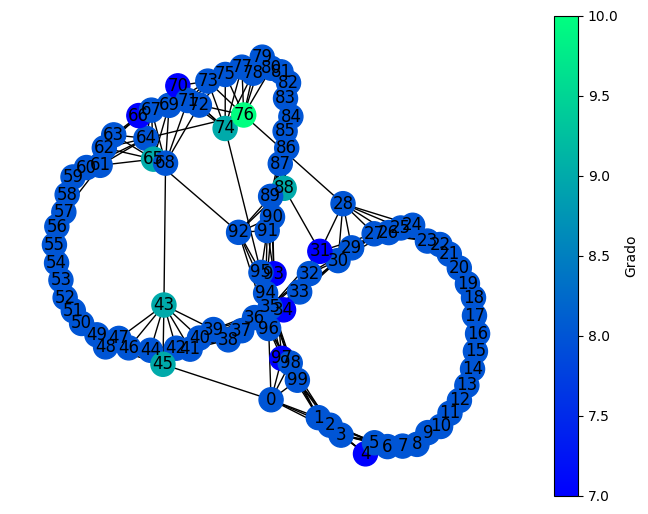

In [56]:
G = nx.watts_strogatz_graph(100,8,0.03)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-3_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-3")

[0, 0, 0, 0, 0, 0, 4, 19, 55, 17, 5]


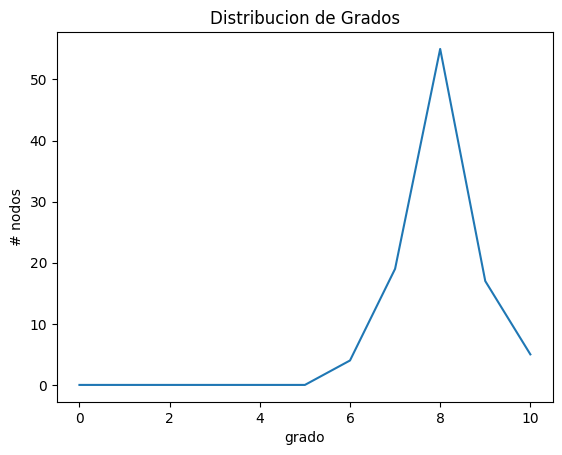

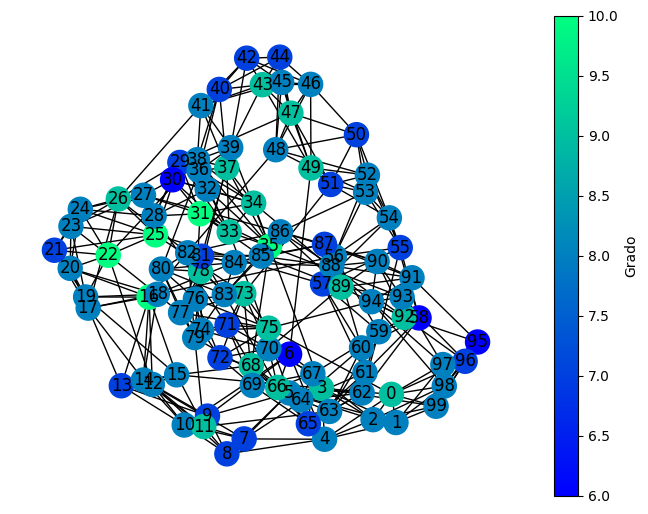

In [57]:
G = nx.watts_strogatz_graph(100,8,0.1)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-4_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-4")

[0, 0, 0, 0, 0, 1, 11, 31, 22, 21, 9, 3, 2]


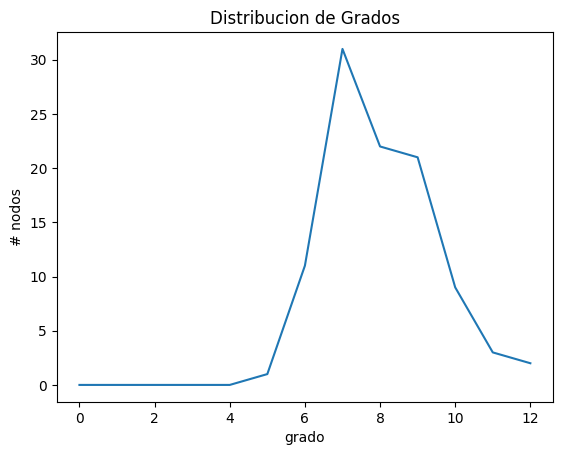

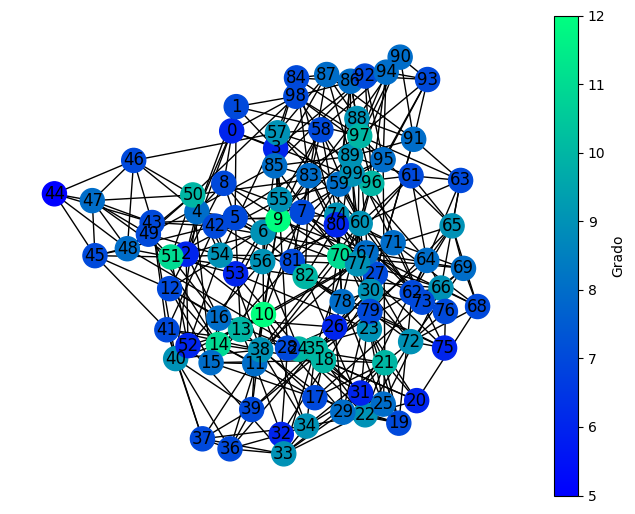

In [58]:
G = nx.watts_strogatz_graph(100,8,0.3)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-5_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-5")

[0, 0, 0, 0, 0, 6, 8, 20, 33, 18, 12, 1, 1, 1]


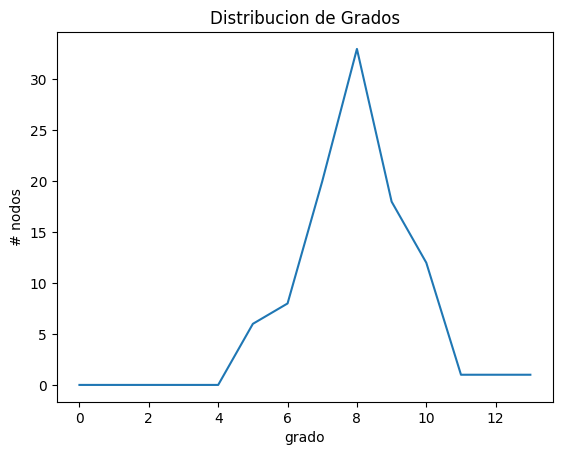

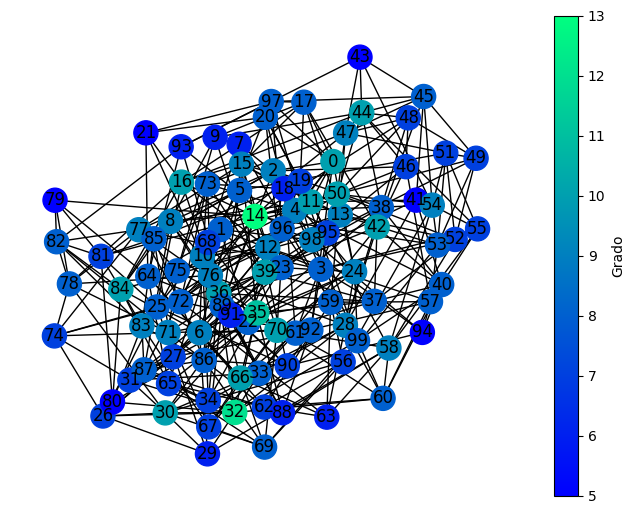

In [59]:
G = nx.watts_strogatz_graph(100,8,0.5)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-6_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-6")

[0, 0, 0, 0, 1, 0, 18, 25, 20, 21, 7, 4, 3, 0, 1]


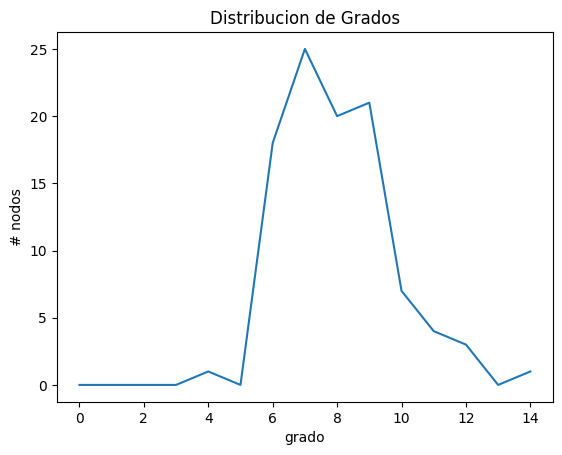

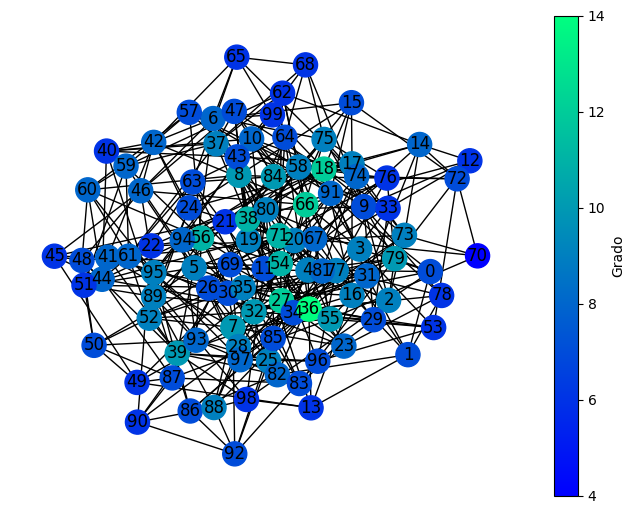

In [60]:
G = nx.watts_strogatz_graph(100,8,0.7)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-7_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-7")

[0, 0, 0, 0, 2, 7, 15, 23, 17, 14, 10, 6, 2, 3, 0, 1]


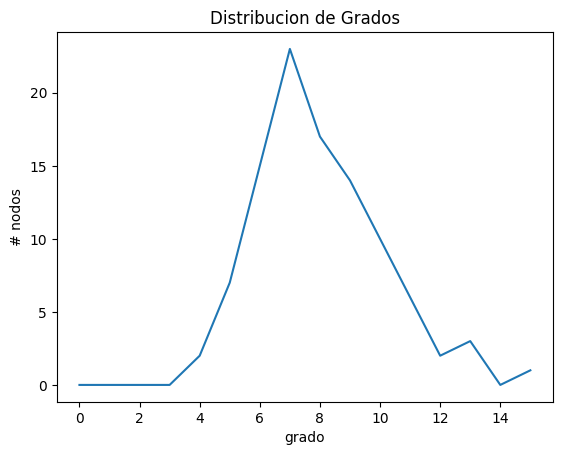

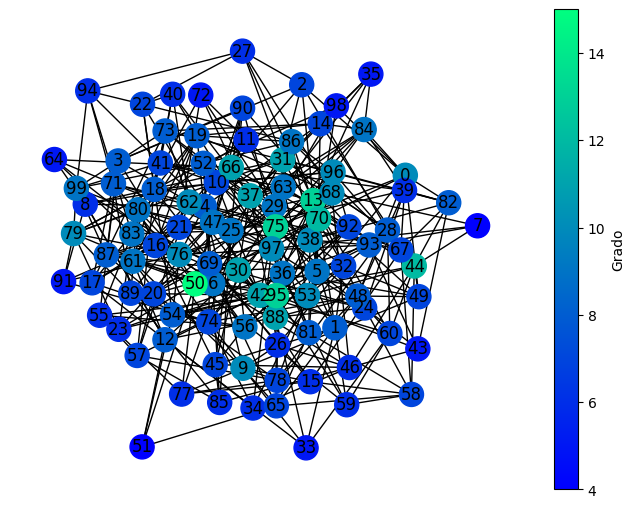

In [61]:
G = nx.watts_strogatz_graph(100,8,0.9)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-8_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-8")

[0, 0, 0, 0, 2, 8, 15, 20, 17, 17, 10, 4, 5, 0, 1, 1]


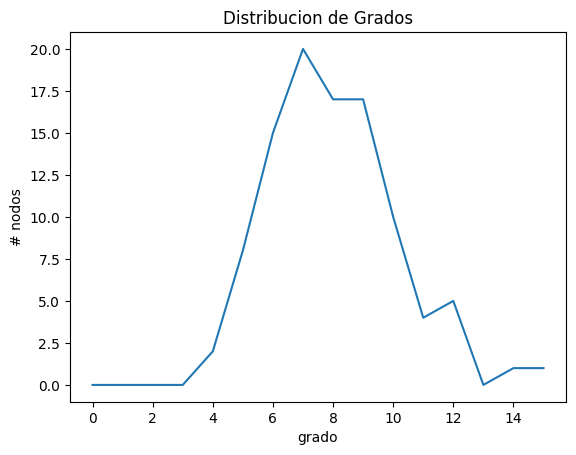

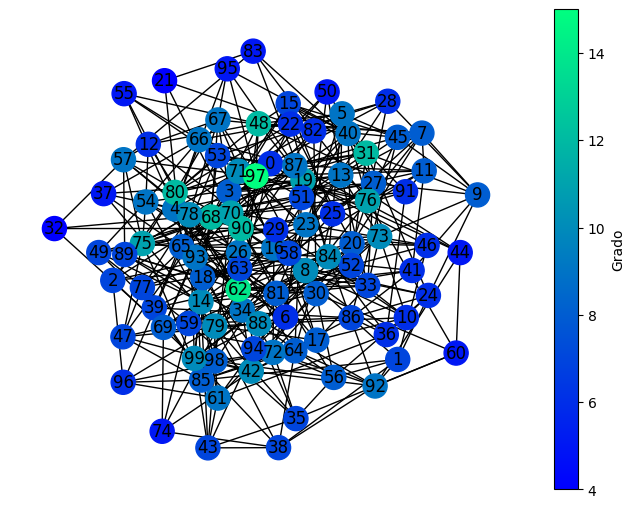

In [62]:
G = nx.watts_strogatz_graph(100,8,1)
dist_grados = grafica_distribucion_grados(G, "distribucion_act_28-9_Watts")
mapa_calor_grado(G,"Mapa calor Watts Act 28-9")